In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd
import numpy as np
from dotenv import load_dotenv, dotenv_values


/home/mezba/Student Stuff Masters/Scalable_ML/lab_wine/ID2223-LAB-1/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# REPLACE .env WITH YOUR OWN KEY_VALUE
config = dotenv_values(".env")
key_value = config["KEY"]
#print(key_value)


In [4]:
project = hopsworks.login(api_key_value=key_value)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/193692
Connected. Call `.close()` to terminate connection gracefully.


In [5]:
red_wine_df = pd.read_csv("red.csv")
red_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
white_wine_df = pd.read_csv("white.csv")
white_wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [7]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1597 non-null   float64
 2   volatile acidity      1598 non-null   float64
 3   citric acid           1598 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1597 non-null   float64
 10  sulphates             1597 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [8]:
#PERCENTILE INFO JUST TO CHECK 
#print(white_wine_df.describe())
percentiles_white = white_wine_df.describe(percentiles=[0.25, 0.75])
print(percentiles_white.loc['25%'])
#print(percentiles.loc['25%', 'pH'])    #how we get individual feature percentile value
#print(type(percentiles))

fixed acidity             6.300000
volatile acidity          0.210000
citric acid               0.270000
residual sugar            1.700000
chlorides                 0.036000
free sulfur dioxide      23.000000
total sulfur dioxide    108.000000
density                   0.991723
pH                        3.090000
sulphates                 0.410000
alcohol                   9.500000
quality                   5.000000
Name: 25%, dtype: float64


In [9]:
#PERCENTILE_INFO JUST TO CHECK
#print(red_wine_df.describe())
percentiles_red = red_wine_df.describe(percentiles=[0.25, 0.75])
print(percentiles_red.loc['25%'])


fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 25%, dtype: float64


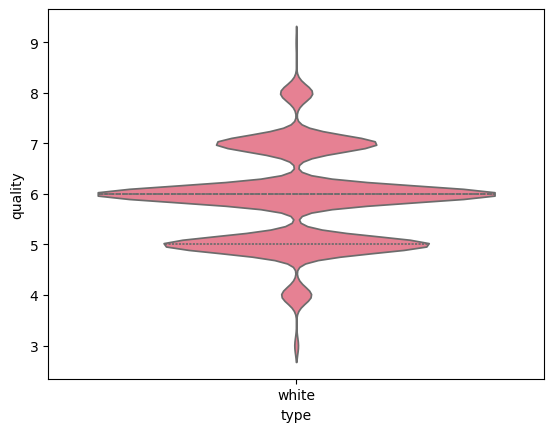

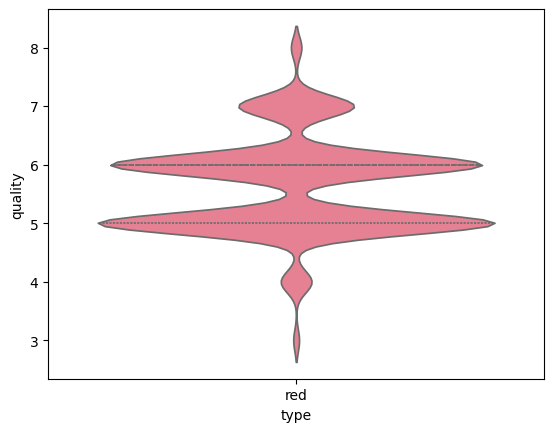

In [10]:
#QUALITY DISTRIBUTION for RED vs WHITE

g = sns.violinplot(y='quality', x='type', data=white_wine_df, inner='quartile')
plt.show()


g = sns.violinplot(y='quality', x='type', data=red_wine_df, inner='quartile')
plt.show()

In [8]:
# RUN THIS ONCE TO GET THE CLEANED WHITE AND RED DATASETS
# ADDING MISSING FEATURE VALUES USING 25 PERCENTILE TO 75 PERCENTILE RANDOM VALUES 

for column in white_wine_df.columns[1:-1]:          #Skip first and last columns, no missing values

    missing_values = white_wine_df[column].isnull()
    lower_bound = white_wine_df[column].quantile(0.25)             #Lowest random value
    upper_bound = white_wine_df[column].quantile(0.75)             #Highest random value

    random_values = np.random.uniform(lower_bound, upper_bound, size=missing_values.sum())      #size -> number of random values to generate
    white_wine_df.loc[missing_values, column] = random_values

white_wine_df.to_csv("white_cleaned.csv", index=False)

for column in red_wine_df.columns[1:-1]:          #Skip first and last columns, no missing values

    missing_values = red_wine_df[column].isnull()
    lower_bound = red_wine_df[column].quantile(0.25)             #Lowest random value
    upper_bound = red_wine_df[column].quantile(0.75)             #Highest random value

    random_values = np.random.uniform(lower_bound, upper_bound, size=missing_values.sum())      #size -> number of random values to generate
    red_wine_df.loc[missing_values, column] = random_values

red_wine_df.to_csv("red_cleaned.csv", index=False)

In [10]:
# COMBINE TWO CSV FILES TO ONE AND ENCODE WHITE=0 AND RED=1

# REMOVE SPACES FROM FEATURE NAME for example: "fixed acidity" becomes "fixed_acidity", otherwise cannot store as feature group
white_wine_df.columns = [col.replace(' ', '_') for col in white_wine_df.columns]
red_wine_df.columns = [col.replace(' ', '_') for col in red_wine_df.columns]

# FOLLOW CONVENTION FOR FEATURE GROUP pH becomes ph
white_wine_df.rename(columns={'pH': 'ph'}, inplace=True)
red_wine_df.rename(columns={'pH': 'ph'}, inplace=True)

# COMBINE RED AND WHITE TO ONE DATAFRAME
wine_df = pd.concat([white_wine_df, red_wine_df], ignore_index=True)

# CHANGE WHITE=0, RED=1 
wine_df['type'] = wine_df['type'].replace({'white': 1, 'red': 0})

#SAVE
wine_df.to_csv('wine_final.csv', index=False)
wine_df.describe()



,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.216088,0.339651,0.318699,5.444320,0.056037,30.525319,115.744574,0.994697,3.218356,0.531236,10.491801,5.818378
std,0.430779,1.296006,0.164603,0.145247,4.757525,0.035032,17.749400,56.521855,0.002999,0.160655,0.148779,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
# Info about final wine dataset
#wine_df.describe()

print("Range of Values for the Features:")
for column, values in wine_df.items():
    min_value = values.min()
    max_value = values.max()
    print(f'"{column}", {min_value}, {max_value}')



Range of Values for the Features:
"type", 0, 1
"fixed_acidity", 3.8, 15.9
"volatile_acidity", 0.08, 1.58
"citric_acid", 0.0, 1.66
"residual_sugar", 0.6, 65.8
"chlorides", 0.009, 0.611
"free_sulfur_dioxide", 1.0, 289.0
"total_sulfur_dioxide", 6.0, 440.0
"density", 0.98711, 1.03898
"ph", 2.72, 4.01
"sulphates", 0.22, 2.0
"alcohol", 8.0, 14.9
"quality", 3, 9


In [ ]:
# Frequency Plot of Classes
sns.countplot(x= wine_df['quality'], palette='viridis')
plt.xlabel('Wine quality')
plt.ylabel('Frequency')
plt.title('Wine quality classes')

wine_df['quality'].value_counts()

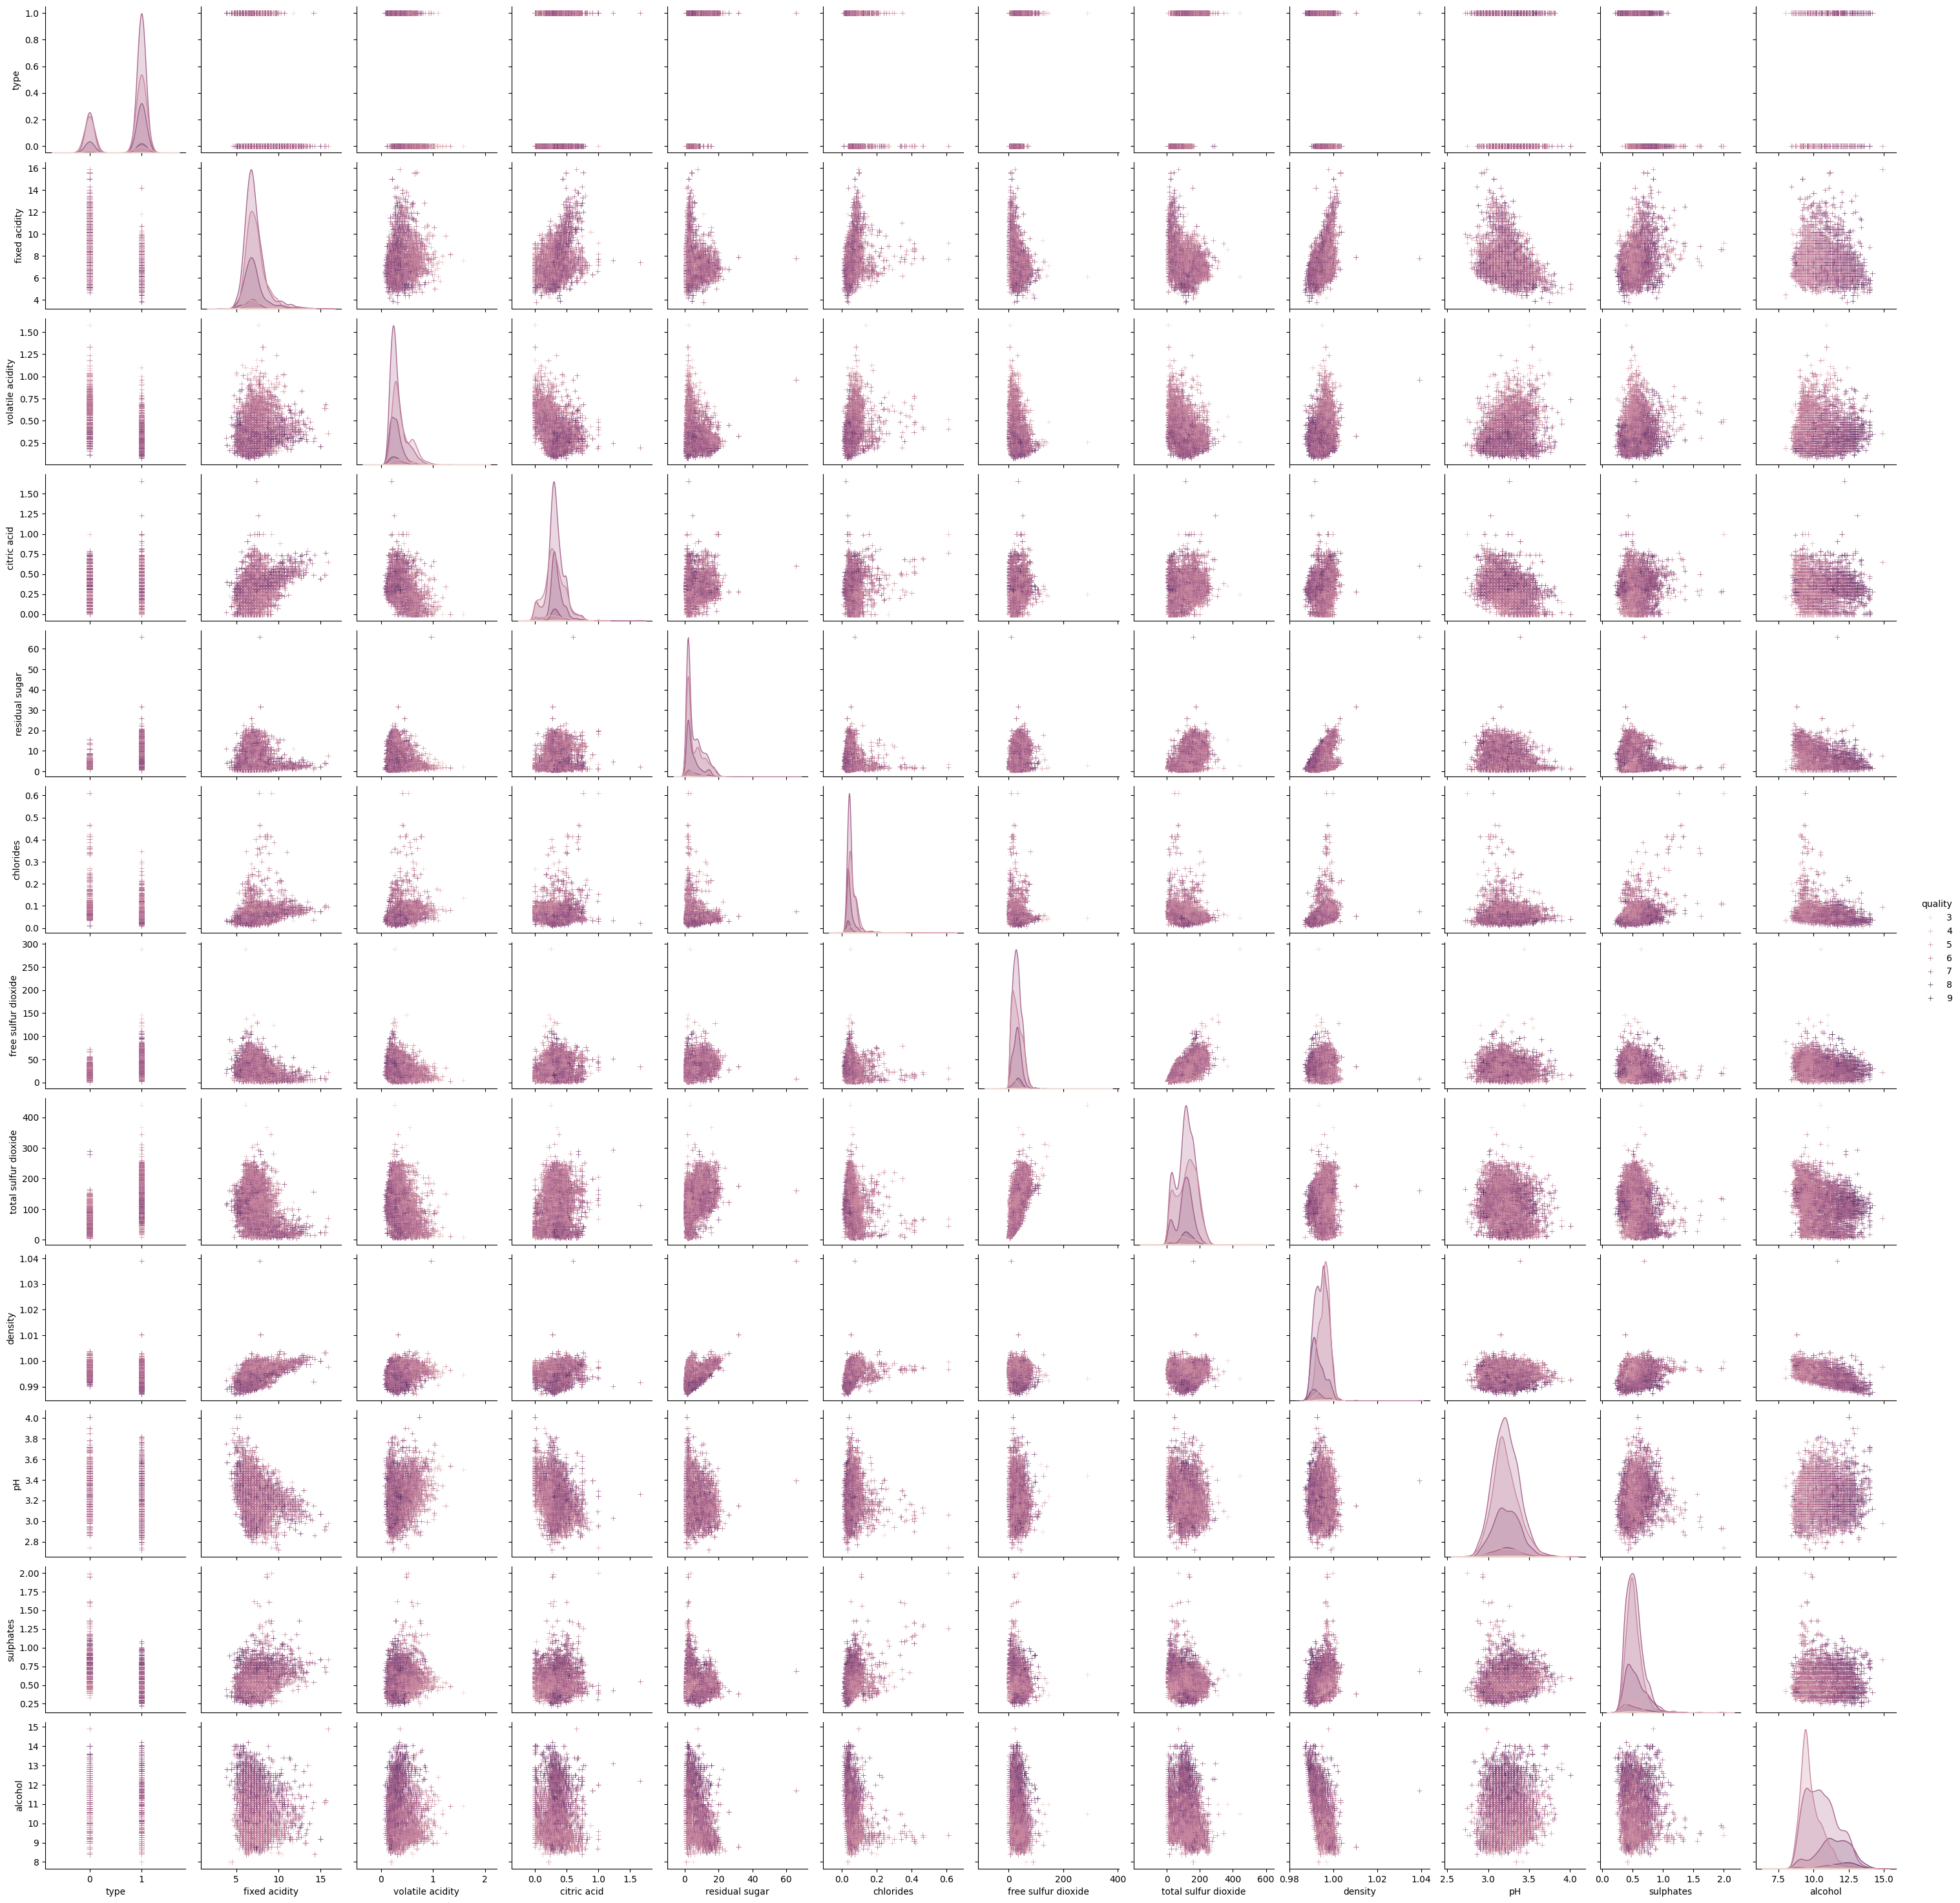

In [28]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()


2023-11-16 21:49:13,226 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-16 21:49:13,246 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0.5, 1.0, 'Wine quality classes')

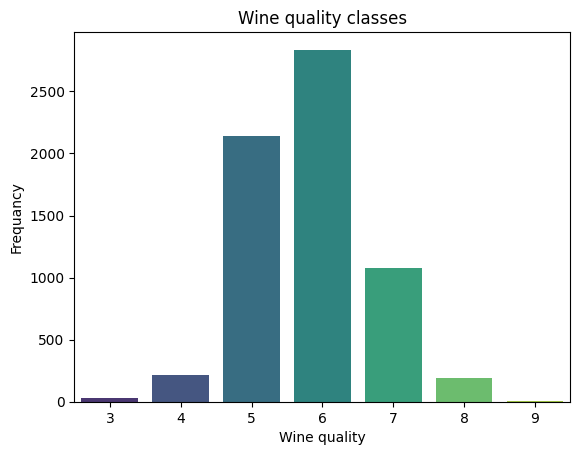

### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [11]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=["type","fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","ph","sulphates","alcohol"], 
    description="Wine Quality Dataset")
wine_fg.insert(wine_df)

2023-11-17 09:50:32,519 INFO: 	12 expectation(s) included in expectation_suite.
Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/193692/fs/193611/fg/216428


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:06 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/193692/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7f3fa6d79300>,
 {
   "success": true,
   "statistics": {
     "evaluated_expectations": 12,
     "successful_expectations": 12,
     "unsuccessful_expectations": 0,
     "success_percent": 100.0
   },
   "results": [
     {
       "success": true,
       "expectation_config": {
         "kwargs": {
           "column": "citric_acid",
           "min_value": 0.0,
           "max_value": 1.66
         },
         "expectation_type": "expect_column_values_to_be_between",
         "meta": {
           "expectationId": 160794
         }
       },
       "exception_info": {
         "raised_exception": false,
         "exception_message": null,
         "exception_traceback": null
       },
       "result": {
         "element_count": 6497,
         "missing_count": 0,
         "missing_percent": 0.0,
         "unexpected_count": 0,
         "unexpected_percent": 0.0,
         "unexpected_percent_total": 0.0,
         "unexpected_percent_nonmissing": 0.0,
         "p

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent data from being written your your feature group if you write values outside the expected ranges.

In [80]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [81]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

expect(suite, "type", 0, 1)
expect(suite, "fixed_acidity", 3.8, 15.9)
expect(suite, "volatile_acidity", 0.08, 1.58)
expect(suite, "citric_acid", 0.0, 1.66)
expect(suite, "residual_sugar", 0.6, 65.8)
expect(suite, "chlorides", 0.009, 0.611)
expect(suite, "free_sulfur_dioxide", 1.0, 289.0)
expect(suite, "total_sulfur_dioxide", 6.0, 440.0)
expect(suite, "density", 0.98711, 1.03898)
expect(suite, "ph", 2.72, 4.01)
expect(suite, "sulphates", 0.22, 2.0)
expect(suite, "alcohol", 8.0, 14.9)

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/193692/fs/193611/fg/216428


In [ ]:
'''
Range of Values for the Features:
"type", 0, 1
"fixed_acidity", 3.8, 15.9
"volatile_acidity", 0.08, 1.58
"citric_acid", 0.0, 1.66
"residual_sugar", 0.6, 65.8
"chlorides", 0.009, 0.611
"free_sulfur_dioxide", 1.0, 289.0
"total_sulfur_dioxide", 6.0, 440.0
"density", 0.98711, 1.03898
"pH", 2.72, 4.01
"sulphates", 0.22, 2.0
"alcohol", 8.0, 14.9

'''
